In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
x_train = np.array ([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042] , 
                    [10.791], [5.313], [7.997], [3.1]],
                    dtype = np.float32)

y_train = np.array ([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827] , 
                    [3.465], [1.65], [2.904], [1.3]], 
                    dtype = np.float32)

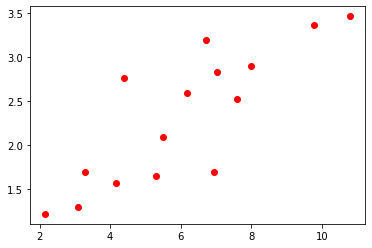

In [28]:
plt.plot(x_train, y_train, 'ro', label = 'original data')
plt.show()

In [12]:
import torch

In [30]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('required_grad for x_train:', X_train.requires_grad)
print('required_grad for y_train:', Y_train.requires_grad)

required_grad for x_train: False
required_grad for y_train: False


In [31]:
input_size = 1
hidden_size = 100
output_size = 1
learning_rate = 1e-6

In [32]:
learning_rate

1e-06

In [33]:
w1 = torch.rand(input_size, hidden_size, requires_grad = True)

In [34]:
w1.shape

torch.Size([1, 100])

In [35]:
w2 = torch.rand(hidden_size, output_size, requires_grad = True)
w2.shape

torch.Size([100, 1])

In [37]:
for iter in range(1, 301):
    y_pred = X_train.mm(w1).clamp(min = 0).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()
    
    if iter % 50 == 0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate*w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 2348.314208984375
100 43.93317794799805
150 4.349189758300781
200 3.6453731060028076
250 3.632854461669922
300 3.632632255554199


In [39]:
print ('w1: ', w1)
print ('w2: ', w2)

w1:  tensor([[ 7.2685e-01, -1.8159e-04,  8.5507e-01,  6.3011e-01,  1.8481e-01,
         -1.2978e-02,  8.3343e-02,  2.7004e-01,  3.1360e-01,  3.2522e-01,
          3.5063e-01, -7.8293e-04,  3.7326e-01,  7.3420e-01, -1.0293e-02,
          7.0621e-01,  1.3094e-01,  7.5538e-01,  4.5974e-02,  3.3744e-01,
          1.6143e-01,  5.3991e-01,  1.4485e-01, -3.9105e-03,  4.5609e-01,
          5.5010e-01,  4.6555e-01, -1.4017e-02, -4.0290e-03,  8.8364e-01,
          8.5287e-02,  5.1784e-01,  6.9910e-01,  3.9850e-01,  4.8981e-01,
          6.5231e-01,  3.5411e-01,  1.0054e+00,  3.1422e-01,  1.0010e+00,
         -1.1988e-02, -5.8373e-06,  8.1265e-01, -3.9911e-03, -3.7558e-03,
         -4.1863e-03, -6.7342e-03,  1.1599e-01,  9.6936e-02,  5.1519e-02,
          5.6743e-01,  2.1775e-01,  1.0022e-01,  1.0531e-01,  9.6063e-01,
         -3.4037e-03,  8.9826e-01,  7.5760e-02,  5.3117e-01,  2.2239e-01,
          2.9257e-01,  2.8536e-01,  1.1129e+00, -3.1045e-03,  8.5568e-01,
         -4.0155e-03,  4.2845e-01

In [40]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 3.1000]])

In [41]:
predicted_in_tensor = x_train_tensor.mm(w1).clamp(min = 0).mm(w2)
predicted_in_tensor

tensor([[1.2117],
        [1.6156],
        [2.0196],
        [2.4639],
        [2.5446],
        [1.5305],
        [3.5908],
        [2.2700],
        [2.7870],
        [0.7957],
        [2.5858],
        [3.9624],
        [1.9509],
        [2.9364],
        [1.1383]], grad_fn=<MmBackward>)

In [42]:
#converting the prediction to a numpy array

predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.2117367],
       [1.615649 ],
       [2.0195618],
       [2.4638648],
       [2.5446472],
       [1.5304596],
       [3.5907807],
       [2.2699869],
       [2.7869945],
       [0.7957071],
       [2.585771 ],
       [3.9623785],
       [1.9508954],
       [2.9364433],
       [1.138298 ]], dtype=float32)

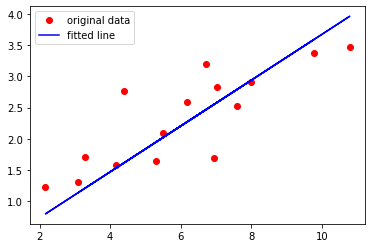

In [44]:
plt.plot(x_train, y_train, 'ro', label = 'original data')

plt.plot(x_train, predicted, 'b', label = 'fitted line')

plt.legend()

plt.show()